<a href="https://colab.research.google.com/github/sarathi-vs13/Deep-Learning/blob/main/Keras_Housing_price_prediction_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding Regression problems using Keras

In [6]:
from google.colab import files
uploaded = files.upload()


Saving boston.csv to boston (2).csv


In [7]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [8]:
#from google.colab import drive
#drive.mount('//content/boston.csv')

In [9]:
# with open (r"C:\Users\adarsha\Downloads\housing.csv") as fi:

#     file_contents = fi.readlines()
#     data_array = []
#     for li in file_contents:
#         data_array.append( li.split())

# data = pd.DataFrame(data_array,
#     columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']).

In [10]:
data = pd.read_csv('boston.csv')

In [11]:
# - CRIM     per capita crime rate by town
# - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS    proportion of non-retail business acres per town
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX      nitric oxides concentration (parts per 10 million)
# - RM       average number of rooms per dwelling
# - AGE      proportion of owner-occupied units built prior to 1940
# - DIS      weighted distances to five Boston employment centres
# - RAD      index of accessibility to radial highways
# - TAX      full-value property-tax rate per $10,000
# - PTRATIO  pupil-teacher ratio by town
# - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
# - LSTAT    % lower status of the population
# - MEDV     Median value of owner-occupied homes in $1000's - target

In [12]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


##Train and Split

In [13]:
# Split data into test and train
train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)

In [14]:
# Stastistical summary of data
# We will be using it to normalize the data
train_stats = train_dataset.describe()
train_stats.pop("MEDV") # because this is our target variable
train_stats = train_stats.transpose()
train_stats



,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AGE,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


In [15]:
train_labels = train_dataset.pop('MEDV')   # Y_train
test_labels = test_dataset.pop('MEDV')

In [16]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

X_train_n = norm(train_dataset)
X_test_n = norm(test_dataset)

In [17]:
train_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34


In [18]:
X_train_n.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,-0.392858,-0.480235,-1.195324,-0.275269,-0.812953,0.096098,-1.819387,0.626356,-0.634910,0.138635,-0.726275,0.234841,-0.751260
371,0.580233,-0.480235,1.040289,-0.275269,0.664389,-0.071193,1.142710,-1.223004,1.699028,1.592762,0.808798,0.140233,-0.439304
219,-0.387867,-0.480235,0.406916,3.622544,-0.035405,0.153292,0.870827,-0.219948,-0.518213,-0.810245,-0.958862,0.428337,-0.301132
403,2.233299,-0.480235,1.040289,-0.275269,1.200033,-1.310863,0.999614,-0.979029,1.699028,1.592762,0.808798,0.461334,1.019339
78,-0.394003,-0.480235,0.247444,-0.275269,-1.011659,-0.048316,-0.513631,0.534699,-0.518213,-0.058535,0.111037,0.351690,-0.039032


##Creating a model

In [19]:
# Build model
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))   # Hidden layer
model.add(Dense(1))  # Output layer

In [20]:
opt = tf.keras.optimizers.Adam()

In [21]:
# compile model
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])

In [22]:
# Fit
history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2)

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 543.6976 - mae: 21.8732 - mse: 543.6976 - val_loss: 647.7967 - val_mae: 23.5407 - val_mse: 647.7967
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 542.5276 - mae: 21.5204 - mse: 542.5276 - val_loss: 610.2670 - val_mae: 22.7018 - val_mse: 610.2670
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 464.4053 - mae: 19.8973 - mse: 464.4053 - val_loss: 564.7375 - val_mae: 21.6724 - val_mse: 564.7375
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 420.6570 - mae: 18.6880 - mse: 420.6570 - val_loss: 507.4843 - val_mae: 20.4177 - val_mse: 507.4843
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 408.8280 - mae: 18.1987 - mse: 408.8280 - val_loss: 436.2919 - val_mae: 18.8655 - val_mse: 436.2919
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 308.5148 - mae: 15.7512 - mse: 308.5148 - val_loss: 353.6521 - val_mae: 16.8991 - val_mse: 353.6521
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.300751,0.308844,0.300751,37.618977,3.321103,37.618977,995
996,0.314137,0.313144,0.314137,36.658569,3.302454,36.658569,996
997,0.339089,0.329538,0.339089,37.470615,3.305886,37.470615,997
998,0.294123,0.313003,0.294123,38.292316,3.345421,38.292316,998
999,0.342703,0.370097,0.342703,37.669132,3.352153,37.669132,999


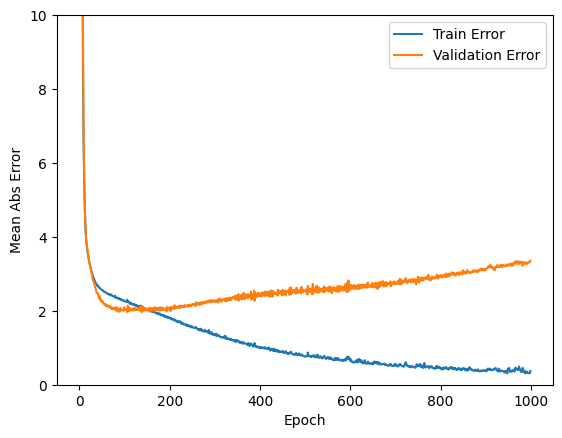

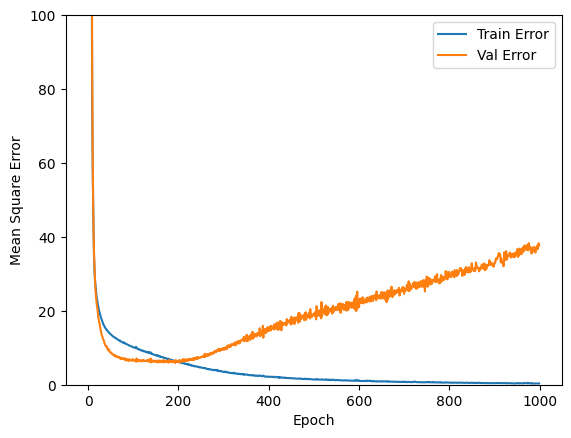

In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
    plt.ylim([0,10])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,100])
    plt.legend()
    plt.show()

plot_history(history)


In [25]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse[2])

Testing set Mean Abs Error:  12.400099754333496


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


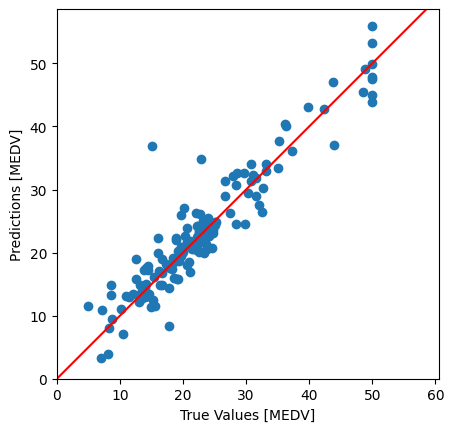

In [26]:
test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()

#Regularization

In [27]:
# create model
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=2e-0),bias_regularizer=tf.keras.regularizers.L2(l2=2e-0)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# compile and run model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])
history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2)

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 565.9700 - mae: 21.4198 - mse: 523.2128 - val_loss: 696.9418 - val_mae: 23.6886 - val_mse: 655.8116
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 586.7264 - mae: 21.7458 - mse: 546.0247 - val_loss: 661.5373 - val_mae: 22.9983 - val_mse: 622.0496
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 534.3279 - mae: 20.4484 - mse: 495.1294 - val_loss: 621.8146 - val_mae: 22.1978 - val_mse: 583.3839
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 497.0174 - mae: 19.7365 - mse: 458.7300 - val_loss: 573.5187 - val_mae: 21.1733 - val_mse: 535.5120
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 470.3044 - mae: 19.2116 - mse: 432.2887 - val_loss: 514.4538 - val_mae: 19.8342 - val_mse: 476.2489
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 390.6084 - mae: 17.1738 - mse: 352.2517 - val_loss: 444.3048 - val_mae: 18.1207 - val_mse: 405.3078
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/

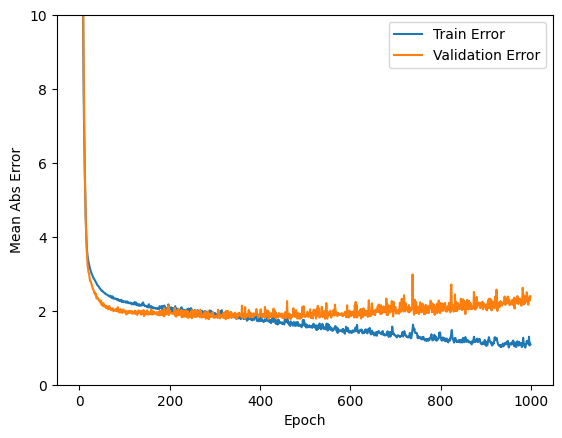

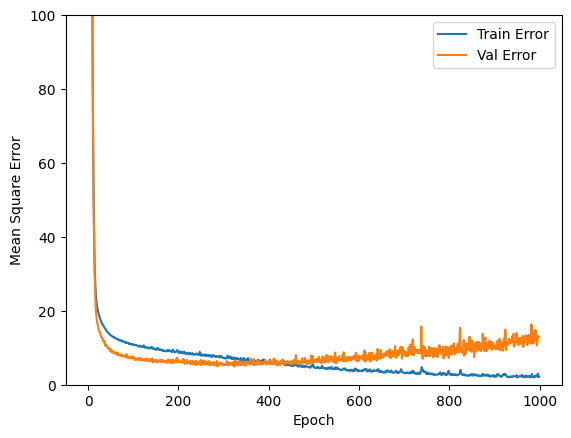

In [28]:
plot_history(history)


Testing set Mean Abs Error:  [10.65970516204834, 2.261235475540161, 9.335968017578125]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


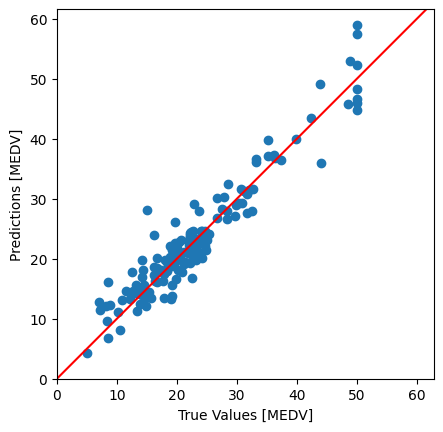

In [29]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse)

test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()


#Early stopping


In [30]:
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2, verbose=1, callbacks=[early_stop])


Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 525.3596 - mae: 21.3012 - mse: 525.3596 - val_loss: 634.8288 - val_mae: 23.1993 - val_mse: 634.8288
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 505.0398 - mae: 20.7221 - mse: 505.0398 - val_loss: 591.9651 - val_mae: 22.2542 - val_mse: 591.9651
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 464.7504 - mae: 19.7237 - mse: 464.7504 - val_loss: 540.2081 - val_mae: 21.0892 - val_mse: 540.2081
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 373.9242 - mae: 17.8801 - mse: 373.9242 - val_loss: 476.1413 - val_mae: 19.6019 - val_mse: 476.1413
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 344.5670 - mae: 16.6867 - mse: 344.5670 - val_loss: 397.8070 - val_mae: 17.7296 - val_mse: 397.8070
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 308.7097 - mae: 15.1040 - mse: 308.7097 - val_loss: 310.4952 - val_mae: 15.3990 - val_mse: 310.4952
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

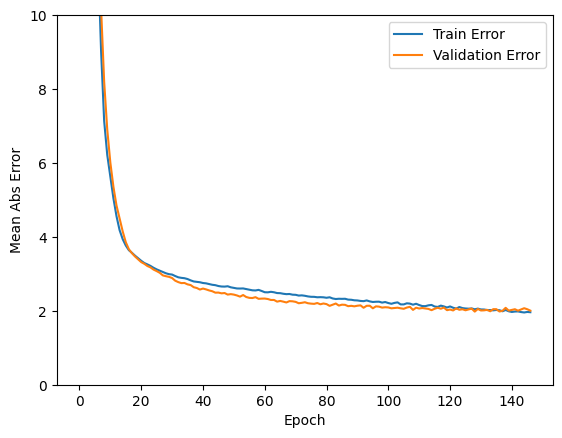

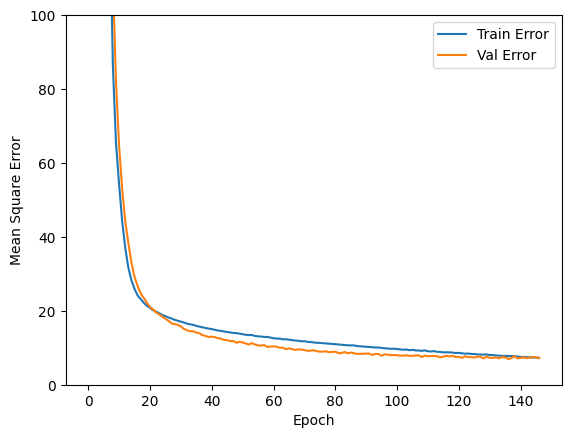

In [32]:
plot_history(history)

Testing set Mean Abs Error:  [9.079033851623535, 2.2596240043640137, 9.079033851623535]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


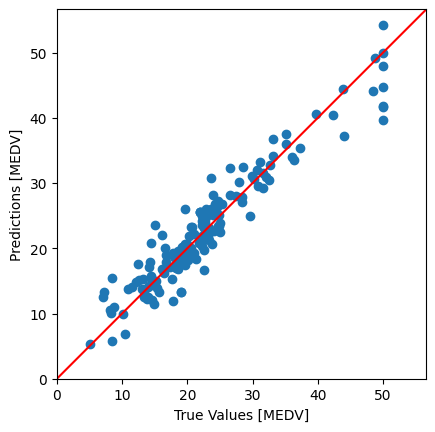

In [33]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse)

test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()


#Dropout

In [34]:
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=2e-0)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])

history = model.fit(X_train_n, train_labels, epochs = 1000,validation_split = 0.2, verbose=1)


Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 573.1423 - mae: 21.3692 - mse: 529.6924 - val_loss: 678.9669 - val_mae: 23.2982 - val_mse: 637.2318
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 564.5729 - mae: 21.2314 - mse: 523.2585 - val_loss: 643.6107 - val_mae: 22.5414 - val_mse: 603.4615
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 548.3624 - mae: 20.2681 - mse: 508.4818 - val_loss: 601.0048 - val_mae: 21.5919 - val_mse: 561.7820
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 488.8212 - mae: 19.3391 - mse: 449.6957 - val_loss: 547.3169 - val_mae: 20.3665 - val_mse: 508.3320
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 465.6656 - mae: 18.6061 - mse: 426.6152 - val_loss: 480.2319 - val_mae: 18.7999 - val_mse: 440.8363
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 372.8515 - mae: 16.1152 - mse: 333.2583 - val_loss: 401.2613 - val_mae: 16.8629 - val_mse: 360.9334
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

Testing set Mean Abs Error:  [10.201489448547363, 2.054361343383789, 8.707343101501465]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


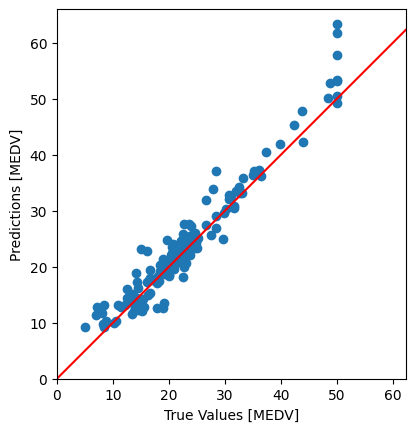

In [35]:
mse = model.evaluate(X_test_n, test_labels,verbose=0)
print("Testing set Mean Abs Error: ", mse)

test_predictions = model.predict(X_test_n).flatten()
train_predictions = model.predict(X_train_n).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()
